## AML 2304, Project - Amazon Music Instrument Reviews

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Data Loading and Description

In [2]:
# Importing the dataset of Amazon Music Reviews as pandas dataframe

music_reviews = pd.read_csv("Musical_instruments_reviews.csv")
music_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
# Getting an idea about the shape of the dataset
# We have 10261 instances of reviews from various users and 9 columns of data for each review of the instrument

music_reviews.shape

(10261, 9)

In [4]:
# Checking the information of the music reviews dataset

music_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
# Checking the columns of our music_reviews data
# We have a total of 9 columns and we are mainly looking into the reviewText column for further analysis

music_reviews.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [6]:
# We are now going to check on how the numerical attributes of our dataset are distributed
# As we have only 2 columns with numerical values, we are looking into them

music_reviews.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


### Exploratory Data Analysis

In [7]:
# We are looking into the "Overall" column to check on how the ratings of the products are distibuted
# We can see that all the ratings are given from 1 to 5 for the music instruments

music_reviews["overall"].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

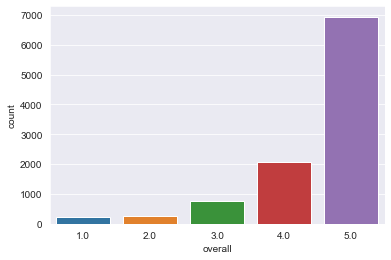

In [8]:
# Plotting the different types of ratings available in our data

sns.countplot(x = "overall", data = music_reviews)

In [9]:
# We are now checking for the NULL values inside the "Overall" rating column
# We can see that there are no NULL values in ratings data

music_reviews["overall"].isnull().sum()

0

In [10]:
# We need only 2 columns ("reviewText","overall") for classifying the data into postive, negative and neutral values
# We are creating a new dataframe for our further analysis with the 2 columns mentioned above

music_reviews = music_reviews[["reviewText","overall"]]
music_reviews.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [11]:
# Changing the column names for further analysis

music_reviews.columns = ["review","rating"]
music_reviews.head()

,review,rating
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


##### As our data has 5 seperate categories for ratings attribute from 1 to 5, we are converting into positive, negative and neutral as follows:

##### Ratings --> 5 and 4 are considered as positive reviews --> We will label as 2
##### Ratings --> 3 is considered as neutral review --> We will label as 1
##### Ratings --> 1 and 2 are considered as negative reviews --> We will label as 0

In [12]:
# Converting the rating data into positive, negative and neutral sets

for i in range(music_reviews.shape[0]):
    if ((music_reviews.rating[i] == 4) or (music_reviews.rating[i] == 5)):
        music_reviews.rating[i] = 2
    elif music_reviews.rating[i] == 3:
        music_reviews.rating[i] = 1
    else:
        music_reviews.rating[i] = 0

<ipython-input-12-3fbb2110d1f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_reviews.rating[i] = 2
<ipython-input-12-3fbb2110d1f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_reviews.rating[i] = 1
<ipython-input-12-3fbb2110d1f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_reviews.rating[i] = 0


In [13]:
music_reviews.head()

,review,rating
0,"Not much to write about here, but it does exac...",2.0
1,The product does exactly as it should and is q...,2.0
2,The primary job of this device is to block the...,2.0
3,Nice windscreen protects my MXL mic and preven...,2.0
4,This pop filter is great. It looks and perform...,2.0


In [14]:
music_reviews.rename(columns={"rating":"rating_label"},inplace=True)

In [15]:
# Checking the type of the column rating
# The column rating has all values in float type

type(music_reviews.rating_label[0])

numpy.float64

In [16]:
# Converting the float values of rating_label column to int values for further analysis

music_reviews["rating_label"] = music_reviews.rating_label.apply(lambda x: int(x))
music_reviews.head()

,review,rating_label
0,"Not much to write about here, but it does exac...",2
1,The product does exactly as it should and is q...,2
2,The primary job of this device is to block the...,2
3,Nice windscreen protects my MXL mic and preven...,2
4,This pop filter is great. It looks and perform...,2


In [17]:
# Now the type of the values in rating_labelcolumn is integer value

type(music_reviews.rating_label[0])

numpy.int64

In [18]:
# Checking the types of data in the rating_label column now
# We can see that in our data most of the instruments have positive reviews

music_reviews.rating_label.value_counts()

2    9022
1     772
0     467
Name: rating_label, dtype: int64

<AxesSubplot:xlabel='rating_label', ylabel='count'>

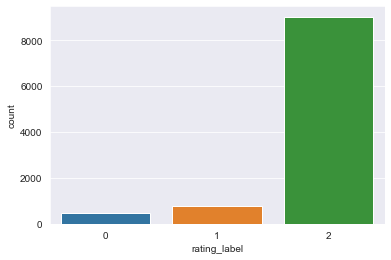

In [19]:
# Plotting the graph using seaborn for the rating_label column

sns.countplot(x = "rating_label", data = music_reviews)

### Text Preprocessing

In [20]:
# We have text data in review column of our dataset. We are now going to explore the text data available in review column.

music_reviews.review

0        Not much to write about here, but it does exac...
1        The product does exactly as it should and is q...
2        The primary job of this device is to block the...
3        Nice windscreen protects my MXL mic and preven...
4        This pop filter is great. It looks and perform...
                               ...                        
10256              Great, just as expected.  Thank to all.
10257    I've been thinking about trying the Nanoweb st...
10258    I have tried coated strings in the past ( incl...
10259    Well, MADE by Elixir and DEVELOPED with Taylor...
10260    These strings are really quite good, but I wou...
Name: review, Length: 10261, dtype: object

In [21]:
# Checking for NULL values in the text data

music_reviews.review.isnull().sum()

7

In [22]:
# We are dropping the 7 NULL values that are present in the dataset

music_reviews.dropna(inplace=True)

In [23]:
# Importing nltk and other required things for cleaning up the text data

import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize

In [24]:
# Checking the punctuation marks available in the string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# Converting all the text in the review column into lowercase for further analysis

music_reviews.review = music_reviews.review.apply(lambda x: x.lower())

In [26]:
# Creating the tokens for the review column in the music data

music_reviews.review = music_reviews["review"].apply(word_tokenize)

In [27]:
# Checking the tokenized data for the punctuation marks removal

music_reviews.review

0        [not, much, to, write, about, here, ,, but, it...
1        [the, product, does, exactly, as, it, should, ...
2        [the, primary, job, of, this, device, is, to, ...
3        [nice, windscreen, protects, my, mxl, mic, and...
4        [this, pop, filter, is, great, ., it, looks, a...
                               ...                        
10256    [great, ,, just, as, expected, ., thank, to, a...
10257    [i, 've, been, thinking, about, trying, the, n...
10258    [i, have, tried, coated, strings, in, the, pas...
10259    [well, ,, made, by, elixir, and, developed, wi...
10260    [these, strings, are, really, quite, good, ,, ...
Name: review, Length: 10254, dtype: object

In [28]:
# Heare we are removing the PUNCTUATION MARKS from our tokenized data

music_reviews.review = music_reviews.review.apply(lambda x: [word for word in x if word not in string.punctuation])
music_reviews.review

0        [not, much, to, write, about, here, but, it, d...
1        [the, product, does, exactly, as, it, should, ...
2        [the, primary, job, of, this, device, is, to, ...
3        [nice, windscreen, protects, my, mxl, mic, and...
4        [this, pop, filter, is, great, it, looks, and,...
                               ...                        
10256          [great, just, as, expected, thank, to, all]
10257    [i, 've, been, thinking, about, trying, the, n...
10258    [i, have, tried, coated, strings, in, the, pas...
10259    [well, made, by, elixir, and, developed, with,...
10260    [these, strings, are, really, quite, good, but...
Name: review, Length: 10254, dtype: object

In [29]:
# Now, we are removing the STOPWORDS that are present in our tokenized data

music_reviews.review = music_reviews.review.apply(lambda x: [word for word in x if word not in stopwords.words("english")])
music_reviews.review

0        [much, write, exactly, 's, supposed, filters, ...
1        [product, exactly, quite, affordable.i, realiz...
2        [primary, job, device, block, breath, would, o...
3        [nice, windscreen, protects, mxl, mic, prevent...
4        [pop, filter, great, looks, performs, like, st...
                               ...                        
10256                             [great, expected, thank]
10257    ['ve, thinking, trying, nanoweb, strings, bit,...
10258    [tried, coated, strings, past, including, elix...
10259    [well, made, elixir, developed, taylor, guitar...
10260    [strings, really, quite, good, would, n't, cal...
Name: review, Length: 10254, dtype: object

### SPACY for Text Visualization

In [30]:
# Importing the necessary spacy and displacy libraries for visualization using spacy
# !pip install spacy
!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy

2021-12-17 16:57:35.993665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-17 16:57:35.993727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
# Initializing the spacy language library to nlp

nlp = spacy.load("en_core_web_sm")

In [32]:
# Taking on of the review as text and applying it into spacy library

text = nlp(" ".join(music_reviews["review"][0]))
text

much write exactly 's supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricing

In [33]:
# Assigning the parts of speech tagging to the review of the instruments using the displacy

options = {"distance":50,"compact":"True","color":"yellow","bg":"green"}
displacy.render(text,style="dep",jupyter=True,options=options)

In [34]:
# We can also open this in seperate page using the serve option of displacy

# new_options = {"distance":100,"compact":"True","color":"yellow","bg":"green"}
# displacy.serve(text,style="dep",options=new_options)

In [35]:
# Also we can check on Named Entity Recognizations using Spacy and displacy libraries

displacy.render(text,style="ent",jupyter=True)

### Using TF-IDF vectorizer to convert the textual data into a sparse matrix

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Initializing the TF-IDF vectorizer to the object tfidf

tfidf = TfidfVectorizer(max_features=5000,preprocessor=" ".join)

In [38]:
# Fitting the input features into the TF-IDF vectorizer

review_features = tfidf.fit_transform(music_reviews.review)

In [39]:
# We got the sparse matrix with features from the review column
# we will try to apply the model to Machine Learning algorithms for text classification

In [40]:
# Now, review_features is our input data for further analysis
# As we have selected max_features as 5000, we got the shape of matrix as obtained below

review_features.shape

(10254, 5000)

In [41]:
# The shape of our label data is as follows

y = music_reviews["rating_label"]
y.shape

(10254,)

In [42]:
# Counter method gives us the number of types and count of them 
# We can see that there are 3 specific types of labels for us in the rating column

from collections import Counter
Counter(y)

Counter({2: 9015, 1: 772, 0: 467})

In [43]:
# Splitting the data into training and testing using train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(review_features, y, test_size=0.3, random_state=101)

In [44]:
# Training data

X_train, y_train

(<7177x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 253961 stored elements in Compressed Sparse Row format>,
 8021    2
 9351    2
 4295    2
 1572    2
 4506    2
        ..
 599     2
 5697    2
 8008    1
 1361    2
 1547    2
 Name: rating_label, Length: 7177, dtype: int64)

### Model Selection and Evaluation

In [45]:
# Importing necessary libraries for different machine learning algorithms

# LinearSVC
# KNearestNeighbors
# RandomForest

In [46]:
# Importing necessary metrics for Model evaluation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
accuracy_list=[]

##### K Nearest Neighbors Classifier

In [48]:
# Importing the K Nearest Neighbors Classifier from sklearn

from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Training the model using KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
# Predicting the Model performance

knn_predictions = knn.predict(X_test)

In [51]:
# Evaluating the KNN model performance

confusion_matrix(knn_predictions,y_test)

array([[  11,    4,   49],
       [   2,    8,   41],
       [ 126,  211, 2625]], dtype=int64)

<AxesSubplot:>

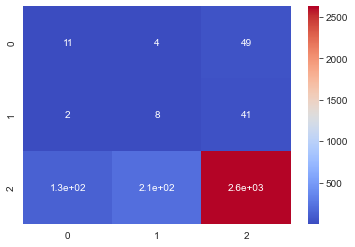

In [52]:
# Plotting the heatmap of Confusion Matrix using the model results

sns.heatmap(confusion_matrix(knn_predictions,y_test),cmap="coolwarm",annot=True)

In [53]:
# Classification Report of our model performance to check the Precision, Recall and F1-Score

print(classification_report(knn_predictions,y_test))

              precision    recall  f1-score   support

           0       0.08      0.17      0.11        64
           1       0.04      0.16      0.06        51
           2       0.97      0.89      0.92      2962

    accuracy                           0.86      3077
   macro avg       0.36      0.40      0.36      3077
weighted avg       0.93      0.86      0.89      3077



In [54]:
# Checking the Accuracy Score of our data using the K Nearnest Neighbors Classifier

knn_acc=accuracy_score(knn_predictions,y_test).round(2)
accuracy_list.append(knn_acc)
knn_acc

0.86

### Random Forest Classifier

In [55]:
# Importing the Random Forest Classifier from the sklearn

from sklearn.ensemble import RandomForestClassifier

In [56]:
# Building the model using the Random Forest Classifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Predicting the Model performance

rf_predictions = rf_classifier.predict(X_test)

<AxesSubplot:>

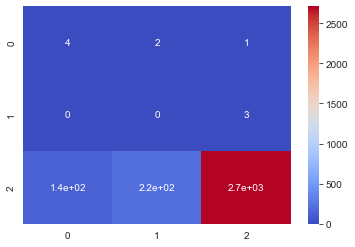

In [58]:
# Evaluating the model performace using the confusion matrix

sns.heatmap(confusion_matrix(rf_predictions,y_test),cmap="coolwarm",annot=True)

In [59]:
# Classification Report of our model performance to check the Precision, Recall and F1-Score

print(classification_report(rf_predictions,y_test))

              precision    recall  f1-score   support

           0       0.03      0.57      0.05         7
           1       0.00      0.00      0.00         3
           2       1.00      0.88      0.94      3067

    accuracy                           0.88      3077
   macro avg       0.34      0.49      0.33      3077
weighted avg       1.00      0.88      0.93      3077



In [60]:
# Checking the Accuracy Score of our data using the Random Forest Classifier

rf_acc=accuracy_score(rf_predictions,y_test).round(2)
accuracy_list.append(rf_acc)
rf_acc

0.88

### Linear Support Vector Classifier

In [61]:
# Importing the Linear Support vector classifier from the sklearn

from sklearn.svm import LinearSVC

In [62]:
# Building the model using the Linear Support Vector Machine Classifier

sv_classifier = LinearSVC()
sv_classifier.fit(X_train, y_train)

LinearSVC()

In [63]:
# Predicting the model performance

sv_predictions = sv_classifier.predict(X_test)

<AxesSubplot:>

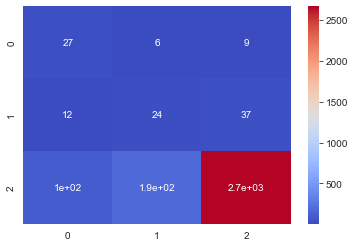

In [64]:
# Evaluating the model performance using the heatmap and confusion matrix

sns.heatmap(confusion_matrix(sv_predictions,y_test),cmap="coolwarm",annot=True)

In [65]:
# Classification Report of our model performance to check the Precision, Recall and F1-Score

print(classification_report(sv_predictions,y_test))

              precision    recall  f1-score   support

           0       0.19      0.64      0.30        42
           1       0.11      0.33      0.16        73
           2       0.98      0.90      0.94      2962

    accuracy                           0.88      3077
   macro avg       0.43      0.62      0.47      3077
weighted avg       0.95      0.88      0.91      3077



In [66]:
# Checking the Accuracy Score of our data using the Linear Support Vector Classifier

lsvc_acc=accuracy_score(sv_predictions,y_test).round(2)
accuracy_list.append(lsvc_acc)
lsvc_acc

0.88

##### Support Vector Classifier

In [67]:
# Importing the Support vector classifier from the sklearn

from sklearn.svm import SVC

In [68]:
# Building the model using the Support Vector Machine Classifier

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [69]:
# Checking on the predictions of our model

svc_predictions = svc.predict(X_test)

<AxesSubplot:>

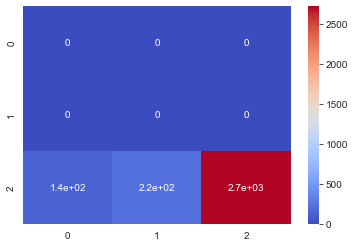

In [70]:
# Evaluating the model performance using the heatmap and confusion matrix

sns.heatmap(confusion_matrix(svc_predictions,y_test),cmap="coolwarm",annot=True)

In [71]:
# Classification Report of our model performance to check the Precision, Recall and F1-Score

print(classification_report(svc_predictions,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.88      0.94      3077

    accuracy                           0.88      3077
   macro avg       0.33      0.29      0.31      3077
weighted avg       1.00      0.88      0.94      3077



C:\Users\itsme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itsme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itsme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Checking the Accuracy Score of our data using the Support Vector Classifier

svc_acc=accuracy_score(svc_predictions,y_test).round(2)
accuracy_list.append(svc_acc)
svc_acc

0.88

##### Decision Tree Classifier

In [73]:
# Importing the Decision Tree classifier from the sklearn

from sklearn.tree import DecisionTreeClassifier

In [74]:
# Building the model using the Decision Tree classifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
# Checking on the predictions of our model

dt_predictions = dt.predict(X_test)

<AxesSubplot:>

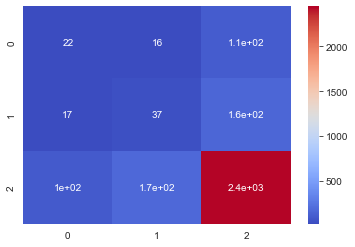

In [76]:
# Evaluating the model performance using the heatmap and confusion matrix

sns.heatmap(confusion_matrix(dt_predictions,y_test),cmap="coolwarm",annot=True)

In [77]:
# Classification Report of our model performance to check the Precision, Recall and F1-Score

print(classification_report(dt_predictions,y_test))

              precision    recall  f1-score   support

           0       0.16      0.15      0.16       144
           1       0.17      0.17      0.17       214
           2       0.90      0.90      0.90      2719

    accuracy                           0.82      3077
   macro avg       0.41      0.41      0.41      3077
weighted avg       0.82      0.82      0.82      3077



In [78]:
# Checking the Accuracy Score of our data using the Decision Tree Classifier

dtc_acc=accuracy_score(dt_predictions,y_test).round(2)
accuracy_list.append(dtc_acc)
dtc_acc

0.82

##### Logistic Regression

In [79]:
# Importing Logistic Regression from the sklearn

from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
lr_predictions = lr.predict(X_test)

<AxesSubplot:>

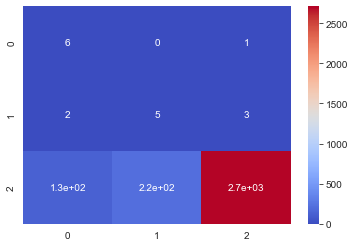

In [82]:
# Evaluating the model performance using the heatmap and confusion matrix

sns.heatmap(confusion_matrix(lr_predictions,y_test),cmap="coolwarm",annot=True)

In [83]:
# Classification Report of our model performance to check the Precision, Recall and F1-Score

print(classification_report(lr_predictions,y_test))

              precision    recall  f1-score   support

           0       0.04      0.86      0.08         7
           1       0.02      0.50      0.04        10
           2       1.00      0.89      0.94      3060

    accuracy                           0.88      3077
   macro avg       0.35      0.75      0.35      3077
weighted avg       0.99      0.88      0.93      3077



In [84]:
# Checking the Accuracy Score of our data using the Logistic Regression

lr_acc=accuracy_score(lr_predictions,y_test).round(2)
accuracy_list.append(lr_acc)
lr_acc

0.88

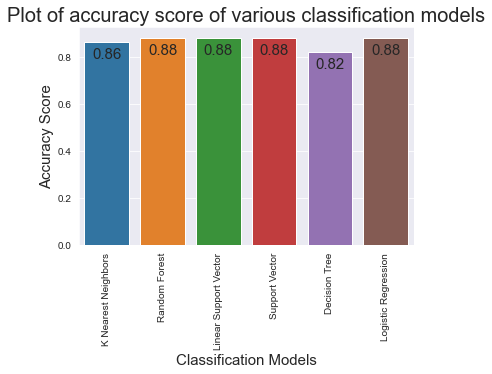

In [85]:
#plotting accuracy scores of applied models
accuracy_labels=["K Nearest Neighbors","Random Forest","Linear Support Vector","Support Vector","Decision Tree","Logistic Regression"]
ax=sns.barplot(x=accuracy_labels, y=accuracy_list)
plt.title('Plot of accuracy score of various classification models',fontsize=20)
plt.xlabel('Classification Models',fontsize=15)
plt.ylabel('Accuracy Score',fontsize=15)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, -12),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

## Conclusions

##### We can see from the Text Classification model performance, that all the models that we applied have performed with an accuracy of 80-88 percentage. All the models are performing extremely well in predicting the positive reviews of our data.
##### But most of the models have not predicted well with the neutral and negative reviews as our model have them in very less numbers.
##### Only Linear Support Vector Classifier is able to perform well in predicting the positive, negative as well as neutral reviews. The accuracy of the Linear support vector model is 88% and we can see better results of recall and precesion for negative as well as neutral reviews along with positive reviews. 
##### So, on a positive note, we are able to achieve an accuracy of 88% with Linear Support vector classifier which is pretty good in predicting the instrument reviews.